# Netflix Dataset – Exploratory Data Analysis
This notebook applies EDA techniques learned in the lab on the Netflix dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [18]:
df = pd.read_csv("Downloads/netflix_titles.csv")
df.head(7)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [7]:
print("Shape:", df.shape)
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

df.info()
df.dtypes

Shape: (8807, 12)
Rows: 8807
Columns: 12
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [8]:
df.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [9]:
print(df.isna().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [11]:
df["director"] = df["director"].fillna("Unknown")
df["cast"] = df["cast"].fillna("Unknown")
df["country"] = df["country"].fillna("Unknown")
df["rating"] = df["rating"].fillna(df["rating"].mode()[0])

In [35]:
print("Duplicates:", df.duplicated().sum())
df = df.drop_duplicates()

Duplicates: 0


In [16]:
df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce")
df["year_added"] = df["date_added"].dt.year

In [37]:
df["duration"] = df["duration"].fillna("Unknown")   
df = df.dropna(subset=["date_added"])  

In [17]:
df.describe(include="all")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
count,8807,8807,8807,8807,8807,8807,8709,8807.000000,8807,8804,8807,8807,8709.000000
unique,8807,2,8807,4529,7693,749,NaN,NaN,17,220,514,8775,NaN
top,s1,Movie,Dick Johnson Is Dead,Unknown,Unknown,United States,NaN,NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope...",NaN
freq,1,6131,1,2634,825,2818,NaN,NaN,3211,1793,362,4,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-23 01:45:29.452290816,2014.180198,NaN,NaN,NaN,NaN,2018.887932
min,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-01 00:00:00,1925.000000,NaN,NaN,NaN,NaN,2008.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2018-04-20 00:00:00,2013.000000,NaN,NaN,NaN,NaN,2018.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-12 00:00:00,2017.000000,NaN,NaN,NaN,NaN,2019.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-26 00:00:00,2019.000000,NaN,NaN,NaN,NaN,2020.000000
max,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-25 00:00:00,2021.000000,NaN,NaN,NaN,NaN,2021.000000


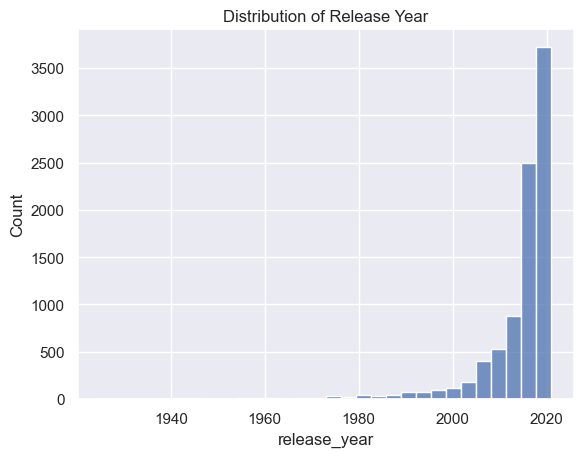

In [19]:
sns.histplot(df["release_year"], bins=30)
plt.title("Distribution of Release Year")
plt.show()

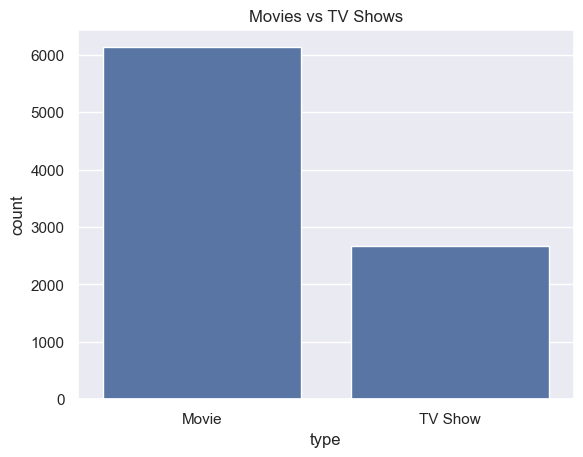

In [20]:
sns.countplot(data=df, x="type")
plt.title("Movies vs TV Shows")
plt.show()

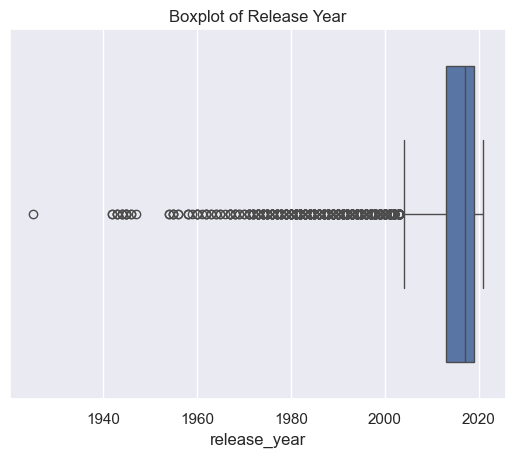

In [21]:
sns.boxplot(x=df["release_year"])
plt.title("Boxplot of Release Year")
plt.show()

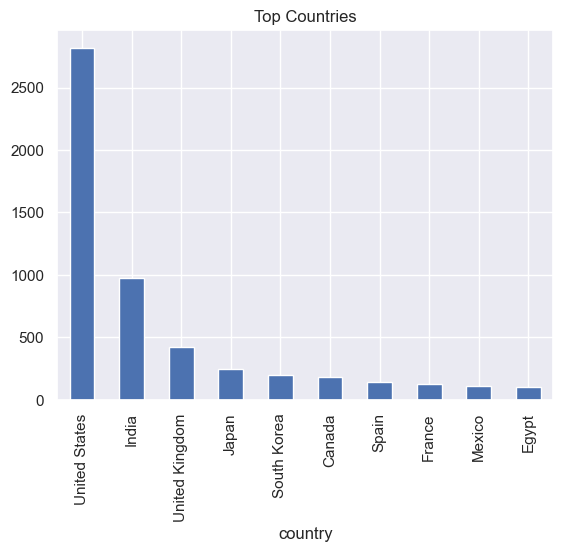

In [22]:
top_countries = df.groupby("country")["show_id"].count().sort_values(ascending=False).head(10)

top_countries.plot(kind="bar")
plt.title("Top Countries")
plt.show()

In [31]:

df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce")
df["year_added"] = df["date_added"].dt.year

scatter_df = df.dropna(subset=["release_year", "year_added"]).copy()

scatter_df[["release_year", "year_added"]].head()

,release_year,year_added
0,2020,2021.0
1,2021,2021.0
2,2021,2021.0
3,2021,2021.0
4,2021,2021.0


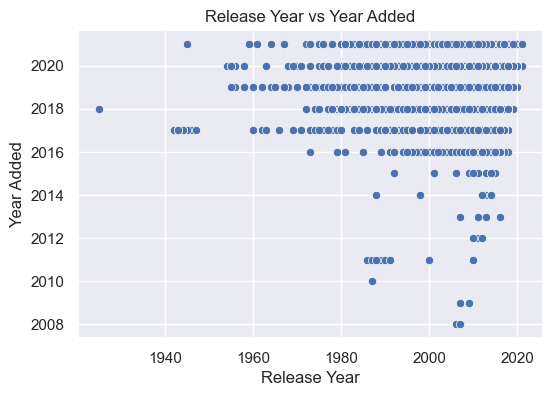

In [32]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=scatter_df, x="release_year", y="year_added")
plt.title("Release Year vs Year Added")
plt.xlabel("Release Year")
plt.ylabel("Year Added")
plt.show()

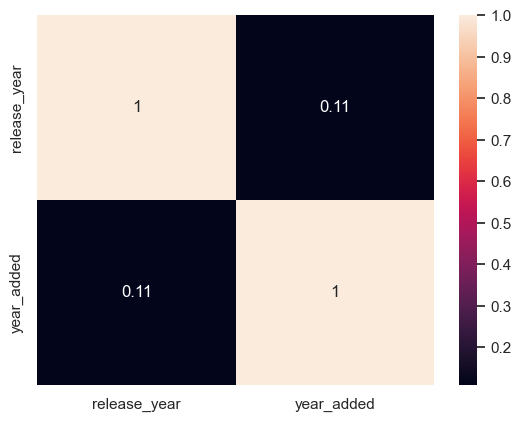

In [33]:
num = df.select_dtypes(include="number")
sns.heatmap(num.corr(), annot=True)
plt.show()

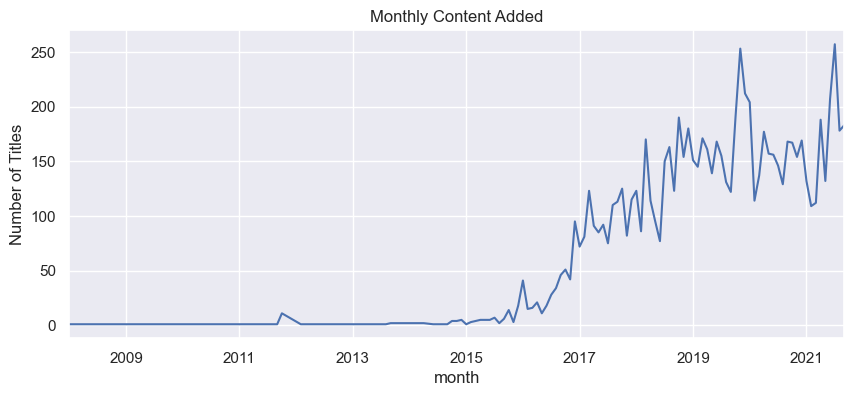

In [34]:
df_time = df.dropna(subset=["date_added"]).copy()
df_time["month"] = df_time["date_added"].dt.to_period("M")

monthly = df_time.groupby("month")["show_id"].count()

monthly.plot(figsize=(10,4))
plt.title("Monthly Content Added")
plt.ylabel("Number of Titles")
plt.show()

# Conclusion

- Netflix contains more Movies than TV Shows.
- The United States produces the most content.
- Content increased significantly after 2015.
- Most titles were added in recent years.
- TV-MA is the most common rating.